In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs = {}):
        if(logs.get('loss')<0.4 and logs.get('accuracy')>0.9):
            print("\nLoss is low enough so cancelling training!")
            self.model.stop_training = True

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

fashion_mnist.load_data() returns a list of two tuples. 
the first tuple contains train images and train lables,
the second tuple contains test images and test labels.

In [16]:
model = keras.Sequential([keras.layers.Conv2D(filters = 1, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(filters = 1, kernel_size = (3,3), activation = 'relu'),                     
                          keras.layers.Flatten(),
                          keras.layers.Dense(10, activation = 'sigmoid'),
                          ])

In [17]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

callbacks = myCallback()

model.fit(train_images,train_labels, epochs = 100, callbacks =[callbacks])

Epoch 1/100
1875/1875 [==============================] - 19s 9ms/step - loss: 1.2803 - accuracy: 0.5623
Epoch 2/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7552 - accuracy: 0.7315
Epoch 3/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6926 - accuracy: 0.7494
Epoch 4/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6582 - accuracy: 0.7607
Epoch 5/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6358 - accuracy: 0.7681
Epoch 6/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6165 - accuracy: 0.7765
Epoch 7/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6014 - accuracy: 0.7814
Epoch 8/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5887 - accuracy: 0.7852
Epoch 9/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5775 - accuracy: 0.7888
Epoch 10/100
1875/1875 [==============================] - 23s

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2700 - accuracy: 0.9030


[0.2699950933456421, 0.902999997138977]

In [8]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_images)

313/313 [==============================] - 4s 14ms/step


313/313 [==============================] - 2s 7ms/step
showing activations for layer  1


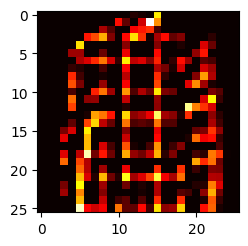

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.01017119 0.00503172 0.         0.18231954 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.09627187 0.03278171
  0.         0.07428575 0.25116917 0.14597297 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.05986305 0.02789966 0.         0.
  0.08956827 0.10027696 0.10990468 0.02087055 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.09921734 0.11888328 0.1561605  0.04490973 0.         0.09439276
  0.17604384 0.11044353 0.00413307 0.0593349  0.09567295 0.03345656
 

C:\Users\P N Charyulu\AppData\Local\Temp\ipykernel_38464\3817368439.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, cols, i + 1)


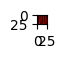

[[6.66443538e-03 6.66443538e-03 6.66443538e-03 6.66443538e-03
  6.66443538e-03 6.66443538e-03 7.61875464e-03 1.73806166e-03
  0.00000000e+00 0.00000000e+00 1.74111165e-02 0.00000000e+00
  0.00000000e+00 2.60520391e-02 4.61034812e-02 5.99809773e-02
  2.16471955e-01 0.00000000e+00 1.27111122e-01 1.20304227e-02
  7.42836157e-03 7.14159478e-03 6.32815296e-03 6.59110770e-03
  6.66443538e-03 6.66443538e-03]
 [6.66443538e-03 6.66443538e-03 6.66443538e-03 6.66443538e-03
  6.66443538e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.62739235e-02 1.58581674e-01 4.08221036e-04
  0.00000000e+00 1.26346815e-02 1.18728980e-01 9.58584696e-02
  0.00000000e+00 0.00000000e+00 1.05301686e-01 8.51013437e-02
  5.22862002e-02 2.67571844e-02 6.66443538e-03 6.66443538e-03
  6.66443538e-03 6.66443538e-03]
 [6.66443538e-03 6.66443538e-03 6.66443538e-03 6.66443538e-03
  0.00000000e+00 0.00000000e+00 2.81820260e-02 0.00000000e+00
  5.35116419e-02 9.67382565e-02 0.00000000e+00 2.56406516e-02
  3.

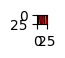

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.03084247 0.0874292  0.22643389 0.2225106  0.06014118
  0.05574006 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01413394 0.         0.
  0.         0.014786   0.14670773 0.22912343 0.05692779 0.
  0.1435992  0.06162342 0.0295674  0.00298124 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.03395273 0.05954286 0.         0.
  0.         0.         0.11154571 0.1941223  0.         0.
  0.05246174 0.08555286 0.11054783 0.07918473 0.01131656 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05664669 0.         0.0914961  0.06047163 0.         0.
  0.0258958  0.         0.00367711 0.12864904 0.06477589 0.
  0.         0.03

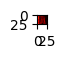

[[0.01009304 0.01009304 0.01009304 0.01009304 0.01009304 0.01009304
  0.01162994 0.01132018 0.00557094 0.0200554  0.21051438 0.23723195
  0.         0.         0.         0.         0.         0.
  0.         0.00761387 0.00907102 0.01086149 0.01084736 0.00916787
  0.01009304 0.01009304]
 [0.01009304 0.01009304 0.01009304 0.01009304 0.01009304 0.00679482
  0.00052405 0.00759787 0.00307372 0.         0.1765343  0.34483343
  0.10082646 0.         0.         0.         0.         0.
  0.         0.         0.         0.0049763  0.01009304 0.01009304
  0.01009304 0.01009304]
 [0.01009304 0.01009304 0.01009304 0.01009304 0.0012331  0.0325295
  0.04221974 0.05153059 0.         0.         0.         0.12563537
  0.23336814 0.03370719 0.         0.         0.04436061 0.04055975
  0.         0.         0.         0.         0.00062707 0.01009304
  0.01009304 0.01009304]
 [0.01009304 0.01009304 0.01009304 0.00718284 0.07556848 0.0715991
  0.01552161 0.15830839 0.         0.         0.05901822 0.

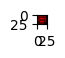

[[0.         0.         0.         0.         0.         0.
  0.         0.00416815 0.03753685 0.09857629 0.12528327 0.02118494
  0.04161327 0.06671986 0.114867   0.04074101 0.10831928 0.1265175
  0.08682002 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01140199
  0.06872907 0.1852371  0.25065556 0.18039282 0.         0.
  0.         0.         0.         0.         0.         0.15829176
  0.2093611  0.12988791 0.05093352 0.01035924 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03646596 0.13460405
  0.2358929  0.19872725 0.14784075 0.07691167 0.04065732 0.03096759
  0.         0.         0.         0.         0.         0.03988572
  0.08532009 0.24170189 0.19170445 0.10795327 0.02210689 0.
  0.         0.        ]
 [0.         0.         0.         0.00965334 0.15985717 0.15444282
  0.09761326 0.         0.         0.         0.         0.
  0.         0.       

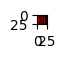

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.12501684 0.25197062
  0.1048592  0.10606697 0.07585752 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00295475 0.         0.05461583 0.259681
  0.11659798 0.09053576 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.04320715 0.05557701 0.         0.         0.         0.08987981
  0.2158277  0.05273542 0.         0.         0.         0.03552453
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.05124755 0.0056456
  0.00079988 0.01942348 0.         0.         0.         0.
  0.         0.         0.         0.         0.

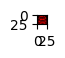

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.87457435e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.20013136e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.07761943e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.88290443e-03 3.51796020e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.26073778e-02
  1.81912184e-01 5.85326552e-02 2.08826326e-02 1.67740881e-01
  1.78483531e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.26084122e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.61207484e-02 0.00000000e+00
  0.

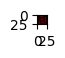

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.02811645 0.         0.03356334 0.07845354 0.0024305  0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01174226 0.04272848 0.0494491  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.06325597 0.03039081 0.         0.
  0.         0.05314709 0.0360374  0.04116178 0.         0.
  0.02879854 0.         0

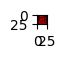

[[0.00268859 0.00268859 0.00268859 0.00268859 0.00268859 0.00268859
  0.00286418 0.         0.         0.         0.         0.
  0.04382368 0.         0.         0.         0.06423719 0.
  0.         0.         0.0034417  0.00277638 0.00340542 0.00324694
  0.00268859 0.00268859]
 [0.00268859 0.00268859 0.00268859 0.00268859 0.00268859 0.
  0.         0.         0.         0.         0.         0.09143987
  0.06658031 0.04154747 0.07873097 0.2182818  0.08221886 0.
  0.         0.         0.         0.         0.00268859 0.00268859
  0.00268859 0.00268859]
 [0.00268859 0.00268859 0.00268859 0.00268859 0.         0.
  0.         0.         0.         0.02616944 0.         0.
  0.         0.11631092 0.09982456 0.05557605 0.         0.
  0.         0.         0.         0.         0.         0.00268859
  0.00268859 0.00268859]
 [0.00268859 0.00268859 0.00268859 0.         0.         0.
  0.         0.12079816 0.19628692 0.1982558  0.09986737 0.02295998
  0.16528662 0.22712657 0.17245303 0.

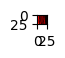

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.03924622e-02
  4.11327817e-02 3.85374874e-02 3.45719576e-01 2.53737330e-01
  9.04744640e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.04022352e-02 1.09996863e-01 1.14086799e-01
  0.00000000e+00 0.00000000e+00 1.54154971e-01 2.96451807e-01
  1.36923999e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.99704431e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.42520249e-01 6.31104186e-02 1.17397629e-01 9.19303298e-02
  0.00000000e+00 0.00000000e+00 6.50240481e-02 1.84056208e-01
  1.

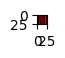

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.07368745 0.090027   0.42397928 0.1476559  0.05926092
  0.09692711 0.0033844  0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.06625819 0.08669791 0.         0.
  0.         0.0132195  0.06127368 0.2643459  0.03610694 0.12728515
  0.1238827  0.09867445 0.04822937 0.01355919 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00957364 0.         0.09694362 0.08453759 0.00433841 0.
  0.         0.         0.16085167 0.11034078 0.         0.03719863
  0.13338391 0.1473803  0.1353469  0.10039423 0.0270774  0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.04295802
  0.0318007  0.         0.04570552 0.         0.         0.
  0.         0.         0.02647623 0.10795568 0.     

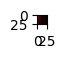

[[0.00158489 0.00158489 0.00158489 0.00158489 0.00158489 0.00158489
  0.00192099 0.         0.00269706 0.03139716 0.11986686 0.
  0.         0.         0.         0.         0.         0.03581418
  0.         0.         0.00125914 0.00175294 0.00099478 0.00157483
  0.00158489 0.00158489]
 [0.00158489 0.00158489 0.00158489 0.00158489 0.00158489 0.
  0.         0.02871686 0.03237067 0.         0.0069435  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00158489 0.00158489
  0.00158489 0.00158489]
 [0.00158489 0.00158489 0.00158489 0.00158489 0.         0.06959634
  0.021671   0.04309889 0.         0.         0.         0.05105717
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00158489
  0.00158489 0.00158489]
 [0.00158489 0.00158489 0.00158489 0.         0.03981664 0.08932144
  0.         0.         0.         0.         0.         0.0110557
  0.         0

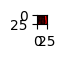

[[0.02908729 0.02908729 0.02908729 0.02908729 0.02908729 0.02908729
  0.02368907 0.02162544 0.05620409 0.01425682 0.         0.
  0.         0.         0.         0.29747626 0.3152262  0.11047679
  0.039663   0.03044453 0.02974714 0.02638818 0.02821822 0.02975447
  0.02908729 0.02908729]
 [0.02908729 0.02908729 0.02908729 0.02908729 0.02908729 0.03211368
  0.06829124 0.06974073 0.06719816 0.         0.         0.
  0.         0.         0.         0.03181825 0.15077758 0.17752801
  0.19849148 0.07995766 0.04650772 0.03053898 0.02908729 0.02908729
  0.02908729 0.02908729]
 [0.02908729 0.02908729 0.02908729 0.02908729 0.03721699 0.05004776
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.02451099 0.         0.
  0.22158155 0.19950879 0.15809281 0.07357894 0.03177292 0.02908729
  0.02908729 0.02908729]
 [0.02908729 0.02908729 0.02908729 0.03175763 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.      

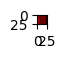

[[0.0161946  0.0161946  0.0161946  0.0161946  0.0161946  0.0161946
  0.01582416 0.         0.         0.07063064 0.26687217 0.22849634
  0.         0.03427413 0.14868577 0.         0.         0.09222791
  0.05290972 0.01797874 0.01520554 0.01600938 0.01601661 0.01555992
  0.0161946  0.0161946 ]
 [0.0161946  0.0161946  0.0161946  0.0161946  0.0161946  0.
  0.         0.02500334 0.15460786 0.09535016 0.00620218 0.02606198
  0.03632606 0.         0.         0.         0.         0.04650828
  0.         0.06090277 0.04218823 0.02144415 0.0161946  0.0161946
  0.0161946  0.0161946 ]
 [0.0161946  0.0161946  0.0161946  0.0161946  0.         0.08535234
  0.17172396 0.22213472 0.13110843 0.         0.         0.07945137
  0.14349304 0.         0.         0.         0.03187221 0.06594454
  0.         0.         0.0426094  0.0467651  0.02590627 0.0161946
  0.0161946  0.0161946 ]
 [0.0161946  0.0161946  0.0161946  0.         0.01147368 0.31119543
  0.03576282 0.03398952 0.         0.         0.0270

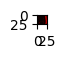

[[0.05773353 0.05773353 0.05773353 0.05773353 0.05773353 0.05773353
  0.05447311 0.04947534 0.05508029 0.         0.         0.
  0.         0.         0.         0.         0.38888514 0.09499572
  0.10926853 0.0590211  0.05889921 0.05610332 0.05709836 0.05777651
  0.05773353 0.05773353]
 [0.05773353 0.05773353 0.05773353 0.05773353 0.05773353 0.05505957
  0.05401364 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.24603748 0.12021175 0.08528158 0.06634676 0.05773353 0.05773353
  0.05773353 0.05773353]
 [0.05773353 0.05773353 0.05773353 0.05773353 0.05055055 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.13626736 0.16289093 0.13371876 0.07366801 0.05773353
  0.05773353 0.05773353]
 [0.05773353 0.05773353 0.05773353 0.05537416 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.

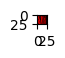

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.09031548
  0.08711801 0.0371008  0.02504106 0.0926336  0.         0.08171234
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04180951 0.         0.         0.13827045
  0.00696785 0.03798886 0.07100186 0.09686068 0.         0.06847237
  0.00356194 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.06363861
  0.         0.02342435 0.07548211 0.         0.         0.
  0.12595282 0.03762759 0.05575394 0.         0.         0.08792772
  0.         0.         0.0315921  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.22592294
  0.         0.10739862 0.07560469 0.         0.         0.07828777
  0.00731094 0.036064

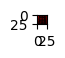

[[0.03459278 0.03459278 0.03459278 0.03459278 0.03459278 0.03459278
  0.03277098 0.05246111 0.07972033 0.10805203 0.1084848  0.
  0.         0.         0.         0.         0.20746574 0.08329666
  0.03307491 0.03262216 0.03525985 0.03368188 0.03176688 0.03361481
  0.03459278 0.03459278]
 [0.03459278 0.03459278 0.03459278 0.03459278 0.03459278 0.06806516
  0.13869241 0.20690575 0.15361446 0.07059398 0.         0.
  0.         0.         0.         0.         0.         0.0832781
  0.19435072 0.06915894 0.04002693 0.03436512 0.03459278 0.03459278
  0.03459278 0.03459278]
 [0.03459278 0.03459278 0.03459278 0.03459278 0.12450878 0.1597636
  0.16208437 0.1028999  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.01999352 0.18822724 0.12118492 0.05974918 0.0341716  0.03459278
  0.03459278 0.03459278]
 [0.03459278 0.03459278 0.03459278 0.06412724 0.27375406 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        

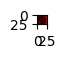

[[4.63768281e-02 4.63768281e-02 4.63768281e-02 4.63768281e-02
  4.63768281e-02 4.63768281e-02 4.48592976e-02 8.27335864e-02
  7.95578435e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.91641971e-01 0.00000000e+00 0.00000000e+00 4.43000831e-02
  4.65447828e-02 4.56180610e-02 4.66585569e-02 4.70531806e-02
  4.63768281e-02 4.63768281e-02]
 [4.63768281e-02 4.63768281e-02 4.63768281e-02 4.63768281e-02
  4.63768281e-02 9.49155688e-02 1.34109750e-01 5.57505414e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.30558401e-01
  1.56865403e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.13374777e-02 3.94170061e-02 4.63768281e-02 4.63768281e-02
  4.63768281e-02 4.63768281e-02]
 [4.63768281e-02 4.63768281e-02 4.63768281e-02 4.63768281e-02
  1.76765203e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.50489277e-02 0.00000000e+00
  0.

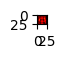

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.88615897e-02 5.32028228e-02
  1.28676131e-01 1.76166832e-01 1.85740143e-01 9.26249176e-02
  2.61263549e-03 2.00982615e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31621957e-02
  8.06778520e-02 6.86923265e-02 4.89843190e-02 2.24393830e-02
  5.37153929e-02 1.32155687e-01 1.32838652e-01 1.63062289e-02
  0.00000000e+00 3.07291001e-02 5.30536771e-02 8.48662853e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.59437954e-03 4.61001992e-02 7.10610002e-02
  8.54823291e-02 2.63108760e-02 3.79136205e-03 8.97550583e-02
  1.

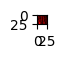

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.54840935e-03
  0.00000000e+00 0.00000000e+00 4.22291085e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.15902759e-01 0.00000000e+00 6.62540793e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.79691464e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.36009261e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.42716184e-01
  1.71182025e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.34249420e-03 3.01164575e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.40919213e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.53569740e-03 0.00000000e+00 0.00000000e+00
  0.

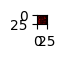

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.02772482
  0.         0.         0.         0.02255751 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.07380139 0.
  0.         0.         0.05907308 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04166268 0.         0.         0.
  0.02787007 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.02491911
  0.05753147 0.04415279 0.01655502 0.         0.         0.05322644
  0.05749486 0.00802904 0.         0.         0.03928228 0.00

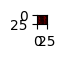

[[0.00241853 0.00241853 0.00241853 0.00241853 0.00241853 0.00241853
  0.00061657 0.03135422 0.06014568 0.00798062 0.         0.
  0.16057995 0.0104619  0.         0.         0.21894194 0.
  0.         0.         0.00314362 0.00151755 0.00299304 0.00268758
  0.00241853 0.00241853]
 [0.00241853 0.00241853 0.00241853 0.00241853 0.00241853 0.04129277
  0.1117636  0.09589735 0.         0.         0.         0.02625027
  0.01957012 0.00223756 0.         0.15369628 0.14736043 0.02218269
  0.04403386 0.         0.         0.         0.00241853 0.00241853
  0.00241853 0.00241853]
 [0.00241853 0.00241853 0.00241853 0.00241853 0.10684542 0.08422093
  0.         0.         0.         0.03763352 0.09613571 0.
  0.         0.         0.09523448 0.07926331 0.         0.10690218
  0.08594567 0.03632284 0.         0.         0.         0.00241853
  0.00241853 0.00241853]
 [0.00241853 0.00241853 0.00241853 0.03671933 0.18259557 0.
  0.         0.         0.02530866 0.04358272 0.08318992 0.
  0.         

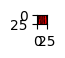

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.0453589  0.05517948 0.43070263 0.19645534 0.0228093
  0.09445503 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.05983404 0.01407409 0.
  0.         0.05153589 0.28179717 0.2578293  0.         0.0328297
  0.12443858 0.07484217 0.03657188 0.00214937 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.10854948 0.09145139 0.         0.
  0.         0.03722745 0.18618758 0.16579185 0.         0.
  0.04308749 0.09586671 0.11616345 0.1015465  0.01743563 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.15875441 0.         0.14095433 0.04917723 0.         0.03519559
  0.11606434 0.         0.         0.15737608 0.12106185 0.
  0

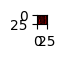

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.10094224 0.         0.
  0.06860436 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00116073
  0.         0.         0.02219627 0.19014601 0.         0.
  0.01465899 0.04162306 0.01747723 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.0219631  0.00915008 0.         0.
  0.01742229 0.         0.         0.         0.         0.
  0.         0.         0.03276987 0.06040713 0.00485632 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.10695428 0.         0.04655383 0.         0.         0.
  0.06752519 0.         0.         0.         0.03019621 0.
  0.         0.  

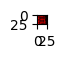

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.38362455e-02 1.60336465e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.52309123e-02 1.58273771e-01
  2.20633000e-01 6.78537712e-02 6.31558076e-02 0.00000000e+00
  1.06942467e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.

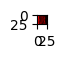

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.60349922e-02 2.74971604e-01 2.47802973e-01
  0.00000000e+00 0.00000000e+00 2.94016814e-03 0.00000000e+00
  0.00000000e+00 3.18216346e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.85686183e-03
  6.51478618e-02 6.33635148e-02 2.52874315e-01 7.75360689e-02
  7.50425979e-02 0.00000000e+00 2.52403431e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.92078960e-02 7.61567503e-02 1.53691396e-01
  5.99582158e-02 0.00000000e+00 0.00000000e+00 2.02977836e-01
  1.

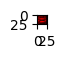

[[3.47539852e-03 3.47539852e-03 3.47539852e-03 3.47539852e-03
  3.47539852e-03 3.47539852e-03 3.64244008e-03 3.36037353e-02
  8.33196640e-02 7.46582672e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.77546234e-04 0.00000000e+00 0.00000000e+00
  3.41007225e-02 1.54866353e-01 9.33589563e-02 6.23038597e-03
  2.88782222e-03 3.55891930e-03 4.02307138e-03 3.19248764e-03
  3.47539852e-03 3.47539852e-03]
 [3.47539852e-03 3.47539852e-03 3.47539852e-03 3.47539852e-03
  3.47539852e-03 4.01729904e-02 1.40367150e-01 2.27461964e-01
  2.00483337e-01 1.29455432e-01 1.02759555e-01 1.25592887e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.36126438e-02
  0.00000000e+00 4.72824723e-02 1.46960050e-01 1.50328875e-01
  6.14548251e-02 1.70966983e-02 3.47539852e-03 3.47539852e-03
  3.47539852e-03 3.47539852e-03]
 [3.47539852e-03 3.47539852e-03 3.47539852e-03 3.47539852e-03
  1.02055214e-01 1.26923695e-01 7.52592832e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.30168866e-02 6.66890442e-02
  5.

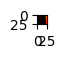

[[0.15428156 0.15428156 0.15428156 0.15428156 0.15428156 0.15428156
  0.14737692 0.147143   0.16942634 0.09173128 0.         0.
  0.         0.         0.         0.         0.22405511 0.2391572
  0.2451866  0.15459211 0.15444885 0.15082924 0.14898163 0.15328673
  0.15428156 0.15428156]
 [0.15428156 0.15428156 0.15428156 0.15428156 0.15428156 0.17189981
  0.21390614 0.17814314 0.03168805 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.29389238 0.2704837  0.20634538 0.16983022 0.15428156 0.15428156
  0.15428156 0.15428156]
 [0.15428156 0.15428156 0.15428156 0.15428156 0.20160905 0.08116332
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.08557303 0.24333929 0.25901234 0.18304658 0.15428156
  0.15428156 0.15428156]
 [0.15428156 0.15428156 0.15428156 0.16982707 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.    

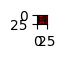

[[0.03097997 0.03097997 0.03097997 0.03097997 0.03097997 0.03097997
  0.03351312 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.01873809 0.03049345 0.03085763 0.03224654 0.03172066 0.03106772
  0.03097997 0.03097997]
 [0.03097997 0.03097997 0.03097997 0.03097997 0.03097997 0.
  0.         0.         0.         0.         0.14720349 0.02029072
  0.         0.         0.1370444  0.00034631 0.         0.
  0.         0.         0.00900658 0.02990377 0.03097997 0.03097997
  0.03097997 0.03097997]
 [0.03097997 0.03097997 0.03097997 0.03097997 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.028989   0.03097997
  0.03097997 0.03097997]
 [0.03097997 0.03097997 0.03097997 0.         0.         0.
  0.05126862 0.14009267 0.18183172 0.11368714 0.         0.06090078
  0.17611894 0.14526346 0.         0.

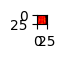

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.66689545e-01 1.82399809e-01
  2.16169164e-01 1.77792832e-01 1.99127078e-01 4.75479290e-02
  5.84556311e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.52136865e-02 1.63685456e-01 1.63676322e-01
  1.46104470e-01 1.95023134e-01 2.00828522e-01 5.43371588e-02
  4.96987924e-02 0.00000000e+00 1.14763323e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.24330682e-02 9.43455473e-02
  1.18583806e-01 1.01310894e-01 5.69252968e-02 1.51332244e-01
  1.

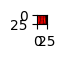

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00706032 0.01640894 0.08293707 0.11183252
  0.08607479 0.10227302 0.08944502 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.0284985  0.0609825  0.0426994  0.         0.         0.21670726
  0.19972743 0.11876256 0.03190932 0.08413353 0.0309938  0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.0213881  0.04489562
  0.05696771 0.03758793 0.         0.         0.02823929 0.06009971
  0.13188607 0.11205163 0.06383551 0.01092646 0.04517847 0.11701081
  0.0014     0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.10904597 0.01768753
  0.         0.05538111 0.03156365 0.02531838 0.09032027 0.00693653
  0.01296554 0.07864571 0.100

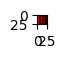

[[2.14061569e-02 2.14061569e-02 2.14061569e-02 2.14061569e-02
  2.14061569e-02 2.14061569e-02 2.06856336e-02 4.13793102e-02
  8.48250166e-02 9.25401375e-02 4.70773503e-02 1.66242495e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.35926709e-01 5.17109782e-02 2.18379591e-02
  2.03105714e-02 2.10458953e-02 2.17246916e-02 2.02406719e-02
  2.14061569e-02 2.14061569e-02]
 [2.14061569e-02 2.14061569e-02 2.14061569e-02 2.14061569e-02
  2.14061569e-02 4.74376641e-02 1.29884407e-01 2.13190779e-01
  2.32714623e-01 1.31998539e-01 0.00000000e+00 7.02771172e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.59063667e-01 4.11235727e-02 1.00146390e-01
  4.88649458e-02 2.54407302e-02 2.14061569e-02 2.14061569e-02
  2.14061569e-02 2.14061569e-02]
 [2.14061569e-02 2.14061569e-02 2.14061569e-02 2.14061569e-02
  9.13339332e-02 1.62522137e-01 1.66115582e-01 1.33376837e-01
  3.71378288e-02 0.00000000e+00 1.06967213e-02 3.82479951e-02
  8.

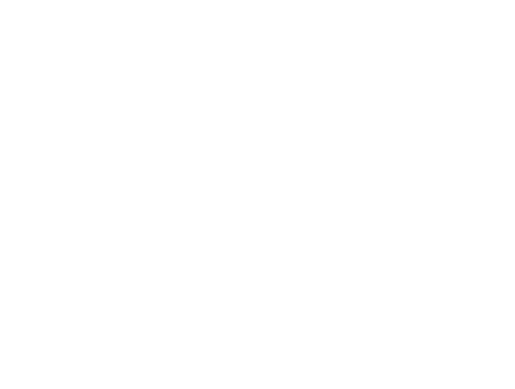

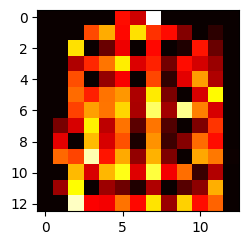

[[0.         0.         0.         0.         0.         0.09627187
  0.07428575 0.25116917 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.11888328 0.1561605  0.09439276
  0.17604384 0.10990468 0.09567295 0.04543514 0.00074267 0.01363191
  0.        ]
 [0.         0.         0.17622218 0.         0.03540953 0.0855839
  0.         0.09422237 0.         0.00878802 0.09966642 0.03554248
  0.        ]
 [0.         0.         0.06259602 0.10637246 0.1362623  0.18118294
  0.0787012  0.10449938 0.03985063 0.09665146 0.07632142 0.05429817
  0.        ]
 [0.         0.         0.12115707 0.         0.05214092 0.09006946
  0.         0.11858726 0.01405263 0.08207716 0.1506716  0.06260554
  0.        ]
 [0.         0.         0.13147537 0.10383213 0.1352069  0.14847143
  0.06178008 0.17986451 0.04233116 0.         0.07674699 0.18573695
  0.        ]
 [0.         0.         0.11646262 0.15188543 0.13609795 0.17174973
  0.06066395 0.21212687 0.05707257 0.2221

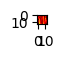

[[6.6644354e-03 6.6644354e-03 6.6644354e-03 7.6187546e-03 8.6273924e-02
  1.5858167e-01 2.6052039e-02 1.1872898e-01 2.1647196e-01 1.2711112e-01
  5.2286200e-02 6.6644354e-03 6.6644354e-03]
 [6.6644354e-03 6.6644354e-03 0.0000000e+00 3.1271794e-01 9.6738257e-02
  2.5640652e-02 1.6986039e-01 8.4387787e-02 1.8341088e-01 7.2058178e-02
  1.1064812e-01 1.8662997e-01 6.6644354e-03]
 [6.6644354e-03 6.6644354e-03 8.0902927e-02 1.1531931e-01 9.0437122e-02
  0.0000000e+00 2.0956972e-01 1.6478475e-02 2.1559966e-01 6.6988274e-02
  1.3704552e-01 1.9565661e-01 6.6644354e-03]
 [6.6644354e-03 4.0036261e-02 2.1604981e-01 1.1761052e-01 1.1775958e-01
  0.0000000e+00 2.1958190e-01 4.9323402e-02 2.0491557e-01 5.5906139e-02
  5.3294087e-03 1.9316342e-01 6.6644354e-03]
 [6.6644354e-03 5.5891316e-02 2.5084287e-01 7.8910599e-03 1.2183535e-01
  0.0000000e+00 2.2606890e-01 6.6883594e-02 2.3701854e-01 6.2147383e-02
  1.0673724e-01 1.4494185e-01 6.6644354e-03]
 [6.6644354e-03 1.9405486e-02 2.6274493e-01 1.4180595e-

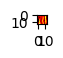

[[0.         0.         0.         0.         0.01413394 0.
  0.03084247 0.22912343 0.2225106  0.1435992  0.0295674  0.
  0.        ]
 [0.         0.         0.         0.05664669 0.0914961  0.
  0.0258958  0.1941223  0.06477589 0.08555286 0.1728988  0.09956444
  0.        ]
 [0.         0.         0.09766457 0.08059175 0.10384543 0.05252741
  0.13672635 0.12553222 0.13739438 0.06555989 0.13331184 0.18510734
  0.        ]
 [0.         0.         0.1774789  0.04040629 0.10701978 0.06783469
  0.11968029 0.06984378 0.11222795 0.02207186 0.14730571 0.24186522
  0.        ]
 [0.         0.         0.11589427 0.         0.08785763 0.06912231
  0.11136939 0.10940862 0.1580218  0.03244705 0.16525707 0.23335226
  0.        ]
 [0.         0.         0.13121724 0.10588201 0.09824897 0.03655322
  0.11592253 0.10678389 0.14959228 0.         0.10755543 0.21798183
  0.        ]
 [0.         0.         0.02921381 0.07712397 0.08846402 0.02730687
  0.13265158 0.13019161 0.15037452 0.05516928 0.1565021 

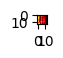

[[0.01009304 0.01009304 0.01009304 0.01162994 0.0200554  0.34483343
  0.10082646 0.         0.         0.00761387 0.01086149 0.01084736
  0.01009304]
 [0.01009304 0.01009304 0.07556848 0.15830839 0.         0.12563537
  0.23336814 0.         0.15244712 0.0449288  0.         0.01009304
  0.01009304]
 [0.01009304 0.09049857 0.23653953 0.07917567 0.         0.15253477
  0.06402175 0.05863035 0.10531324 0.10003647 0.03923767 0.01009304
  0.01009304]
 [0.01009304 0.22745481 0.22082928 0.14680175 0.01401228 0.23610666
  0.13785303 0.12699468 0.13114649 0.06623214 0.06193553 0.
  0.01009304]
 [0.01009304 0.23212765 0.27118948 0.09937727 0.         0.15359929
  0.08749902 0.04381795 0.09126873 0.04723295 0.13828258 0.
  0.01009304]
 [0.01009304 0.31804326 0.13248117 0.13773642 0.         0.18832573
  0.11246838 0.06796088 0.13245767 0.16243683 0.         0.
  0.01009304]
 [0.01009304 0.26373917 0.18696986 0.14606476 0.         0.14700648
  0.09323674 0.08984488 0.11035831 0.15279701 0.0561961 

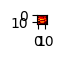

[[0.         0.         0.01140199 0.1852371  0.25065556 0.12528327
  0.06671986 0.114867   0.15829176 0.2093611  0.05093352 0.
  0.        ]
 [0.         0.00965334 0.15985717 0.2358929  0.14784075 0.04065732
  0.         0.         0.03988572 0.24170189 0.19170445 0.11177828
  0.        ]
 [0.         0.05129642 0.06109776 0.15525296 0.15311728 0.15496911
  0.1571689  0.13843203 0.16879822 0.21106154 0.03944044 0.05295233
  0.        ]
 [0.         0.04185577 0.07918775 0.05327126 0.00984981 0.00133882
  0.         0.         0.         0.         0.09623192 0.06585077
  0.        ]
 [0.         0.00965334 0.         0.09473255 0.10279151 0.09548919
  0.09924623 0.09210587 0.02890871 0.08919699 0.05834173 0.01862194
  0.        ]
 [0.         0.09656286 0.18216288 0.12312977 0.         0.
  0.         0.         0.         0.09299965 0.17161633 0.12861982
  0.        ]
 [0.         0.06214068 0.13024886 0.09691561 0.24723755 0.23659453
  0.23222202 0.23028788 0.21244633 0.13032266 0.

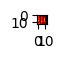

[[0.         0.         0.         0.         0.00295475 0.259681
  0.11659798 0.07585752 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.05124755 0.05557701 0.         0.08987981
  0.2158277  0.         0.03552453 0.         0.         0.
  0.        ]
 [0.         0.0048037  0.1034548  0.05665244 0.         0.16031834
  0.04035103 0.09425443 0.04044446 0.04240628 0.0229073  0.
  0.        ]
 [0.         0.11383256 0.1648483  0.03788339 0.         0.10739964
  0.00273101 0.06043847 0.05777982 0.         0.07539326 0.
  0.        ]
 [0.         0.09220278 0.13625896 0.01838681 0.         0.14050391
  0.05982211 0.08351347 0.03871486 0.04674745 0.13987866 0.
  0.        ]
 [0.         0.17188388 0.0662922  0.10006091 0.         0.13125214
  0.04362027 0.05076028 0.01985723 0.174503   0.02477114 0.
  0.        ]
 [0.         0.10646895 0.07978578 0.12904942 0.         0.1473343
  0.10097739 0.11973014 0.03813019 0.19282508 0.00274657 0.
  0.        ]
 [0.     

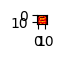

[[0.         0.         0.0088829  0.00687457 0.         0.06260738
  0.18191218 0.16774088 0.17848353 0.         0.         0.
  0.        ]
 [0.         0.00722764 0.03260841 0.09088244 0.17343818 0.1266239
  0.21810491 0.20353484 0.0986692  0.12068775 0.07139935 0.
  0.        ]
 [0.         0.01887962 0.         0.20187294 0.         0.
  0.         0.         0.         0.         0.01385805 0.02514076
  0.        ]
 [0.         0.00682127 0.         0.1127617  0.16036251 0.1587536
  0.15539292 0.15954924 0.07863816 0.1177274  0.1285942  0.
  0.        ]
 [0.         0.00722764 0.11151831 0.09892424 0.         0.
  0.         0.         0.00140358 0.         0.20573278 0.07211808
  0.        ]
 [0.         0.00242389 0.12680584 0.02264114 0.13633277 0.10499851
  0.1014276  0.10733458 0.12676217 0.150972   0.         0.08731469
  0.        ]
 [0.         0.00899234 0.10463479 0.05032926 0.15616204 0.13560313
  0.14144588 0.13798846 0.1526591  0.14126492 0.16375886 0.13749129
  0.  

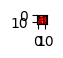

[[0.         0.         0.         0.         0.         0.
  0.02811645 0.07845354 0.0024305  0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.06325597 0.
  0.05314709 0.0494491  0.         0.02879854 0.00478579 0.
  0.        ]
 [0.         0.         0.         0.01871926 0.         0.
  0.         0.00502642 0.         0.         0.04524214 0.
  0.        ]
 [0.         0.         0.         0.01382884 0.0789192  0.12165625
  0.02482995 0.09417443 0.         0.01026877 0.00121647 0.
  0.        ]
 [0.         0.         0.03462624 0.         0.         0.03570595
  0.         0.03040275 0.         0.         0.05672256 0.06113323
  0.        ]
 [0.         0.         0.03583299 0.         0.01767981 0.07739276
  0.         0.07502392 0.00345878 0.0356661  0.         0.00890899
  0.        ]
 [0.         0.         0.03527612 0.         0.02287513 0.07382111
  0.         0.08493926 0.01147845 0.08723024 0.05379019 0.10951298
  0.        ]
 [0.  

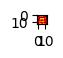

[[0.00268859 0.00268859 0.00268859 0.00286418 0.         0.09143987
  0.06658031 0.2182818  0.08221886 0.         0.0034417  0.00340542
  0.00268859]
 [0.00268859 0.00268859 0.         0.12079816 0.1982558  0.09986737
  0.22712657 0.17245303 0.13310507 0.13272612 0.         0.00268859
  0.00268859]
 [0.00268859 0.00268859 0.04954806 0.12305224 0.02266246 0.
  0.04474681 0.         0.01740287 0.         0.01431189 0.0776703
  0.00268859]
 [0.00268859 0.00268859 0.         0.1087516  0.1625671  0.12333509
  0.19310065 0.13078466 0.08541711 0.11916352 0.05008335 0.00727616
  0.00268859]
 [0.00268859 0.00268859 0.14857264 0.02935092 0.01438435 0.
  0.01354048 0.         0.05064213 0.         0.1429736  0.10946275
  0.00268859]
 [0.00268859 0.01536052 0.16967422 0.         0.17896575 0.11497463
  0.169049   0.11867994 0.19236988 0.07178584 0.         0.13087797
  0.00268859]
 [0.00268859 0.         0.07548593 0.         0.20942074 0.1764309
  0.21833558 0.17369023 0.23478922 0.11906105 0.17

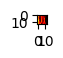

[[0.         0.         0.05040224 0.1140868  0.04113278 0.34571958
  0.136924   0.         0.01997044 0.         0.         0.
  0.        ]
 [0.         0.0439754  0.3708248  0.11739763 0.         0.18405621
  0.10786089 0.         0.15655115 0.         0.         0.
  0.        ]
 [0.         0.32239902 0.3166479  0.09593017 0.02801234 0.28201902
  0.08222871 0.14358112 0.15540297 0.01023303 0.05648607 0.
  0.        ]
 [0.         0.51061064 0.00913723 0.11421171 0.04179726 0.301166
  0.08100399 0.19292073 0.1244929  0.12171806 0.11733569 0.
  0.        ]
 [0.         0.44744143 0.         0.12938106 0.00464858 0.30543667
  0.04077706 0.20635034 0.13607134 0.11956701 0.06238428 0.
  0.        ]
 [0.         0.49648014 0.0532153  0.02664087 0.         0.31603685
  0.06033033 0.16671133 0.10823159 0.34795484 0.         0.
  0.        ]
 [0.         0.35713392 0.15373293 0.09142749 0.         0.3141794
  0.08390676 0.14494216 0.10142559 0.29076996 0.         0.
  0.        ]
 [0.     

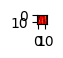

[[0.         0.         0.         0.         0.08669791 0.
  0.07368745 0.42397928 0.1476559  0.1238827  0.04822937 0.
  0.        ]
 [0.         0.         0.04295802 0.0318007  0.09694362 0.00433841
  0.         0.16085167 0.03719863 0.1473803  0.1353469  0.12932274
  0.        ]
 [0.         0.         0.17676103 0.02610716 0.14950831 0.19284359
  0.10458588 0.23335914 0.12061989 0.09299621 0.23414032 0.13785416
  0.        ]
 [0.         0.         0.18764077 0.0205624  0.12978871 0.15214771
  0.04926021 0.11512717 0.07265622 0.06400455 0.24668969 0.22117263
  0.        ]
 [0.         0.         0.11201547 0.         0.15729396 0.20368037
  0.06997029 0.22391467 0.10772454 0.07267056 0.21703863 0.19323854
  0.        ]
 [0.         0.         0.18041982 0.0649919  0.12035318 0.1363822
  0.04309614 0.18769623 0.09636639 0.11924867 0.1192767  0.28407758
  0.        ]
 [0.         0.         0.09268365 0.12067561 0.16981289 0.20585077
  0.1307801  0.2731774  0.15450601 0.11802898 0.0

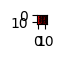

[[0.00158489 0.00158489 0.00158489 0.02871686 0.03237067 0.11986686
  0.         0.         0.03581418 0.         0.00175294 0.00158489
  0.00158489]
 [0.00158489 0.00158489 0.08932144 0.04309889 0.         0.05105717
  0.         0.         0.         0.         0.00119861 0.00158489
  0.00158489]
 [0.00158489 0.0198668  0.15301953 0.04355439 0.         0.03307392
  0.         0.         0.02241312 0.         0.         0.00158489
  0.00158489]
 [0.00158489 0.07941198 0.         0.         0.         0.02267447
  0.         0.         0.         0.         0.01749423 0.
  0.00158489]
 [0.00158489 0.08540004 0.         0.         0.         0.0259291
  0.         0.         0.00419885 0.02914224 0.         0.
  0.00158489]
 [0.00158489 0.08887143 0.         0.04181093 0.         0.0060646
  0.         0.         0.         0.02082066 0.         0.
  0.00158489]
 [0.00158489 0.06758214 0.         0.03393385 0.         0.01795571
  0.         0.00367959 0.00738092 0.05027146 0.         0

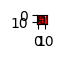

[[0.02908729 0.02908729 0.03211368 0.06974073 0.06719816 0.
  0.         0.29747626 0.3152262  0.19849148 0.04650772 0.02975447
  0.02908729]
 [0.02908729 0.03175763 0.05004776 0.         0.         0.
  0.         0.03861062 0.         0.22158155 0.22682759 0.06446179
  0.02908729]
 [0.02908729 0.02908729 0.         0.         0.0778954  0.05901249
  0.03714234 0.13694258 0.11753775 0.         0.20910843 0.19985294
  0.02908729]
 [0.02908729 0.02908729 0.11952867 0.         0.06247181 0.
  0.         0.         0.         0.         0.16795027 0.22277951
  0.02908729]
 [0.02908729 0.03175763 0.         0.         0.10046302 0.07885234
  0.         0.0336871  0.02935416 0.         0.02370718 0.22468236
  0.02908729]
 [0.02908729 0.         0.09703878 0.         0.00202011 0.
  0.         0.03920592 0.         0.         0.005954   0.23839453
  0.02908729]
 [0.02908729 0.         0.         0.06804104 0.13714807 0.10387279
  0.03739294 0.16067854 0.12722634 0.         0.         0.20969

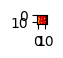

[[0.0161946  0.0161946  0.0161946  0.02500334 0.15460786 0.26687217
  0.03632606 0.14868577 0.09222791 0.06090277 0.04218823 0.0161946
  0.0161946 ]
 [0.0161946  0.0161946  0.31119543 0.22213472 0.13110843 0.12758479
  0.14349304 0.00221261 0.06594454 0.07934652 0.0467651  0.02590627
  0.0161946 ]
 [0.0161946  0.0161946  0.25101954 0.20371236 0.08898963 0.18522665
  0.15561    0.12468523 0.1336291  0.1239164  0.10252495 0.02144415
  0.0161946 ]
 [0.0161946  0.03141218 0.21520677 0.03254544 0.00302295 0.09552877
  0.050183   0.12801531 0.05995936 0.06961483 0.09784747 0.00665006
  0.0161946 ]
 [0.0161946  0.05042499 0.24875982 0.03895092 0.04381005 0.13544962
  0.11187007 0.1107868  0.0746619  0.07275385 0.17165568 0.
  0.0161946 ]
 [0.0161946  0.16353394 0.22205822 0.20320885 0.         0.09833676
  0.07807457 0.03833683 0.06309231 0.28492758 0.1501237  0.10031004
  0.0161946 ]
 [0.0161946  0.11709172 0.14160532 0.19481765 0.06449468 0.18769084
  0.13048756 0.16371892 0.10530423 0.1523

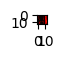

[[0.05773353 0.05773353 0.05773353 0.05447311 0.05508029 0.
  0.         0.         0.38888514 0.24603748 0.08528158 0.05777651
  0.05773353]
 [0.05773353 0.05773353 0.05055055 0.         0.         0.
  0.         0.         0.         0.13626736 0.18273577 0.16589361
  0.05773353]
 [0.05773353 0.05773353 0.         0.02169617 0.00499642 0.
  0.         0.         0.08592157 0.         0.         0.26807183
  0.05773353]
 [0.05773353 0.05773353 0.01344697 0.         0.         0.
  0.         0.         0.         0.         0.         0.2287601
  0.05773353]
 [0.05773353 0.05773353 0.         0.         0.         0.
  0.         0.         0.02536397 0.         0.         0.19676217
  0.05773353]
 [0.05773353 0.         0.08093926 0.         0.0050179  0.
  0.         0.         0.05284318 0.         0.         0.25522754
  0.05773353]
 [0.05773353 0.         0.         0.         0.         0.
  0.         0.         0.05343544 0.         0.         0.21531379
  0.06462412]
 [0.057

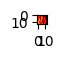

[[0.         0.         0.         0.         0.04180951 0.13827045
  0.08711801 0.09686068 0.08171234 0.00356194 0.         0.
  0.        ]
 [0.         0.         0.22592294 0.10739862 0.07560469 0.07828777
  0.12595282 0.05575394 0.08792772 0.07862681 0.08231184 0.
  0.        ]
 [0.         0.         0.22692868 0.10442533 0.03455734 0.25715387
  0.03934681 0.20164092 0.         0.1022317  0.21973975 0.
  0.        ]
 [0.         0.         0.36568394 0.10619447 0.06285045 0.27814353
  0.08314987 0.22076498 0.0305539  0.09018602 0.15692301 0.
  0.        ]
 [0.         0.         0.3993075  0.01903237 0.09022735 0.29311085
  0.11643907 0.27937162 0.01809407 0.06084354 0.14121358 0.
  0.        ]
 [0.         0.         0.37050638 0.14747185 0.05747388 0.31194335
  0.11373052 0.24487785 0.04253032 0.21303916 0.07276203 0.11245771
  0.        ]
 [0.         0.         0.30206025 0.17823361 0.         0.31030107
  0.07323083 0.22033258 0.02906092 0.34096336 0.104393   0.06111762
  0.

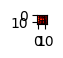

[[0.03459278 0.03459278 0.06806516 0.20690575 0.15361446 0.1084848
  0.         0.         0.20746574 0.19435072 0.04002693 0.03459278
  0.03459278]
 [0.03459278 0.06412724 0.27375406 0.16208437 0.         0.
  0.         0.         0.         0.18822724 0.12118492 0.05755518
  0.03459278]
 [0.03459278 0.15743002 0.05144515 0.         0.12364265 0.08196957
  0.11489762 0.         0.1485269  0.02074612 0.         0.09826896
  0.03459278]
 [0.03459278 0.1596964  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.04749006
  0.03459278]
 [0.03459278 0.09942428 0.         0.         0.05796736 0.
  0.05514438 0.         0.         0.         0.         0.02681798
  0.03459278]
 [0.03459278 0.17665642 0.14349917 0.         0.         0.
  0.         0.         0.         0.         0.         0.06755017
  0.03459278]
 [0.03459278 0.11014529 0.05427839 0.         0.16060096 0.19383466
  0.13100547 0.03883167 0.16821882 0.         0.         0.055408

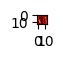

[[0.04637683 0.04637683 0.09491557 0.13410975 0.07955784 0.
  0.         0.1305584  0.19164197 0.04430008 0.04654478 0.04705318
  0.04637683]
 [0.04637683 0.08920512 0.1767652  0.         0.05340282 0.05504893
  0.         0.06912359 0.02430994 0.03557504 0.1033542  0.04637683
  0.04637683]
 [0.04637683 0.10798515 0.01365457 0.17219336 0.06495661 0.
  0.06719003 0.         0.08385883 0.         0.01126199 0.11059114
  0.04637683]
 [0.04637683 0.04637683 0.05152914 0.         0.03974008 0.
  0.07549064 0.01071888 0.03399314 0.08988875 0.0429408  0.0504465
  0.04637683]
 [0.04637683 0.08920512 0.06041807 0.01013812 0.         0.
  0.03120146 0.         0.05678326 0.         0.131674   0.09399088
  0.04637683]
 [0.04637683 0.06991556 0.06015242 0.00404021 0.0547059  0.
  0.05090915 0.01469089 0.07977018 0.08577745 0.04586538 0.11829516
  0.04637683]
 [0.04637683 0.08578069 0.03184992 0.00149675 0.         0.
  0.         0.         0.01618234 0.         0.04177747 0.12286393
  0.04637683]

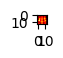

[[0.         0.         0.         0.0131622  0.08067785 0.05320282
  0.17616683 0.18574014 0.0307291  0.05305368 0.         0.
  0.        ]
 [0.         0.         0.10782319 0.07174155 0.08548233 0.08975506
  0.10333014 0.04385963 0.02752636 0.07176077 0.05348612 0.
  0.        ]
 [0.         0.         0.04825474 0.05939125 0.07146579 0.12481083
  0.07162404 0.10680322 0.04310033 0.090578   0.06534745 0.
  0.        ]
 [0.         0.         0.07863581 0.04940546 0.02121522 0.05997288
  0.01317645 0.06785838 0.02234458 0.03886178 0.10519676 0.01741256
  0.        ]
 [0.         0.         0.07713071 0.04905684 0.05901073 0.08975938
  0.05455728 0.09917484 0.03498033 0.07747783 0.10106446 0.
  0.        ]
 [0.         0.         0.10756202 0.11695606 0.04457237 0.07649362
  0.03801604 0.08177064 0.02610419 0.13212383 0.12497219 0.10246661
  0.        ]
 [0.         0.         0.05973318 0.13718201 0.10499981 0.14769383
  0.11739756 0.15340817 0.078612   0.14051555 0.06369419 0.04330

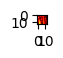

[[0.         0.         0.00979691 0.00654841 0.         0.13600926
  0.         0.14271618 0.11590276 0.06625408 0.00301165 0.
  0.        ]
 [0.         0.00740424 0.04409192 0.17457707 0.07872984 0.00851508
  0.10665517 0.00438881 0.08945545 0.         0.023706   0.10622169
  0.        ]
 [0.         0.08035385 0.14743212 0.08938105 0.04608904 0.
  0.16346286 0.         0.15311193 0.03363471 0.01305573 0.10400718
  0.        ]
 [0.         0.1088192  0.02114974 0.0600505  0.12465572 0.05527265
  0.18746342 0.06605771 0.11215616 0.10434832 0.         0.05228283
  0.        ]
 [0.         0.08608782 0.240499   0.         0.03711344 0.
  0.13375661 0.00042321 0.16025501 0.         0.05702083 0.06851921
  0.        ]
 [0.         0.02216455 0.14267981 0.01768106 0.04826458 0.06492165
  0.1679694  0.03406425 0.13910748 0.05861736 0.06989518 0.12983559
  0.        ]
 [0.         0.03760343 0.1271847  0.01384087 0.00178092 0.05002662
  0.10708448 0.         0.12360526 0.00283066 0.16545977

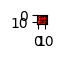

[[0.         0.         0.         0.         0.         0.07380139
  0.         0.05907308 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.02491911 0.05753147 0.04166268 0.05322644
  0.05749486 0.         0.03928228 0.         0.         0.00563683
  0.        ]
 [0.         0.         0.05865485 0.01201692 0.01577597 0.03054602
  0.         0.02015464 0.         0.0051595  0.02751829 0.00082732
  0.        ]
 [0.         0.         0.01195402 0.03551796 0.         0.00733419
  0.00803833 0.         0.         0.01680087 0.         0.
  0.        ]
 [0.         0.         0.04098735 0.         0.         0.
  0.         0.02002699 0.         0.03162963 0.03097538 0.
  0.        ]
 [0.         0.0119552  0.02488014 0.03437357 0.01968252 0.02336593
  0.0182803  0.02504346 0.01502203 0.         0.04764336 0.04059941
  0.        ]
 [0.         0.01130935 0.         0.0423349  0.02073118 0.03488166
  0.02702329 0.03391638 0.02027748 0.07076363 0.         0.
  0.

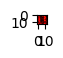

[[0.00241853 0.00241853 0.04129277 0.1117636  0.06014568 0.02625027
  0.16057995 0.15369628 0.21894194 0.04403386 0.00314362 0.00299304
  0.00241853]
 [0.00241853 0.03671933 0.18259557 0.         0.04358272 0.09613571
  0.04124454 0.140208   0.10690218 0.08594567 0.15297443 0.00241853
  0.00241853]
 [0.00241853 0.09090751 0.0756374  0.25904799 0.01383632 0.01588634
  0.03167246 0.02109394 0.06879634 0.02109815 0.06309618 0.04418698
  0.00241853]
 [0.00241853 0.0594447  0.04559254 0.         0.00768487 0.0157966
  0.00270546 0.09273633 0.01742427 0.12222745 0.15589105 0.
  0.00241853]
 [0.00241853 0.03671933 0.05809871 0.08147641 0.00948224 0.02824927
  0.0025618  0.         0.02026073 0.04274011 0.15029582 0.07201611
  0.00241853]
 [0.00241853 0.06261599 0.07599305 0.1118544  0.02685076 0.02624042
  0.00864004 0.03416947 0.01756813 0.12355785 0.04424582 0.08846441
  0.00241853]
 [0.00241853 0.05983046 0.03964372 0.08902331 0.01458318 0.01973801
  0.03547758 0.03535349 0.0287415  0.1496

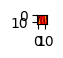

[[0.         0.         0.         0.         0.05983404 0.01407409
  0.05153589 0.43070263 0.19645534 0.12443858 0.03657188 0.
  0.        ]
 [0.         0.         0.         0.15875441 0.14095433 0.03519559
  0.11606434 0.18618758 0.12106185 0.09586671 0.15097916 0.1518179
  0.        ]
 [0.         0.         0.15033284 0.01708223 0.13161062 0.11607407
  0.13695332 0.18856725 0.1643809  0.10392509 0.22937988 0.19322303
  0.        ]
 [0.         0.         0.23397307 0.03016604 0.14905092 0.11743115
  0.14912298 0.09562726 0.16061279 0.07686146 0.217071   0.28905722
  0.        ]
 [0.         0.         0.14801823 0.         0.12654841 0.11899744
  0.10947002 0.17658909 0.17759135 0.07926156 0.24895109 0.26461098
  0.        ]
 [0.         0.         0.11504115 0.13345559 0.15644386 0.09422059
  0.12311383 0.1749349  0.1604966  0.         0.12283003 0.33907205
  0.        ]
 [0.         0.         0.0061466  0.18072246 0.1403832  0.08401826
  0.13768134 0.21828547 0.14452478 0.1700

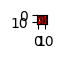

[[0.         0.         0.         0.         0.         0.00116073
  0.         0.19014601 0.         0.06860436 0.01747723 0.
  0.        ]
 [0.         0.         0.         0.10695428 0.04655383 0.
  0.06752519 0.         0.03019621 0.         0.06040713 0.09774966
  0.        ]
 [0.         0.         0.21306473 0.         0.02671029 0.04797125
  0.         0.05760258 0.         0.         0.12296744 0.05120191
  0.        ]
 [0.         0.         0.01992279 0.         0.01147464 0.06375012
  0.         0.034429   0.         0.01209098 0.0856842  0.07518346
  0.        ]
 [0.         0.         0.05389658 0.         0.02613842 0.06342253
  0.         0.09214918 0.01068643 0.         0.10117386 0.03707156
  0.        ]
 [0.         0.         0.08879969 0.08296023 0.05988452 0.04869007
  0.         0.08978072 0.         0.         0.         0.13550477
  0.        ]
 [0.         0.         0.04730636 0.118203   0.02322205 0.0508608
  0.         0.0964041  0.         0.12547477 0. 

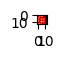

[[0.         0.         0.         0.         0.         0.16033646
  0.220633   0.06315581 0.00106942 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.11544818 0.06950904 0.08652276
  0.13841936 0.07843544 0.10334755 0.08950593 0.         0.
  0.        ]
 [0.         0.02039592 0.09475543 0.07066454 0.         0.0199496
  0.03751389 0.01118535 0.03173836 0.03620232 0.04635203 0.
  0.        ]
 [0.         0.08491199 0.08879855 0.13120547 0.09989262 0.19823037
  0.13783224 0.14907752 0.08050067 0.0661994  0.05170319 0.
  0.        ]
 [0.         0.08788708 0.12405638 0.10371561 0.         0.06354744
  0.01982595 0.02262214 0.03203787 0.0229785  0.0688428  0.
  0.        ]
 [0.         0.13837588 0.10492322 0.02907881 0.03959218 0.13589427
  0.0820975  0.08669634 0.10167947 0.09616156 0.         0.
  0.        ]
 [0.         0.10750289 0.10227475 0.09430791 0.06475914 0.13415954
  0.07965296 0.09853248 0.10569423 0.13028225 0.11221105 0.
  0.        ]
 [0.   

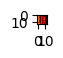

[[0.         0.         0.         0.00585686 0.06514786 0.2749716
  0.0750426  0.02524034 0.03182163 0.         0.         0.
  0.        ]
 [0.         0.         0.2349007  0.1536914  0.05995822 0.20297784
  0.16276628 0.         0.07425814 0.         0.         0.
  0.        ]
 [0.         0.04559853 0.33118442 0.09582799 0.         0.17580816
  0.0808578  0.0983883  0.09868943 0.03378297 0.0696922  0.
  0.        ]
 [0.         0.23259044 0.10469399 0.11571565 0.         0.14483003
  0.06777583 0.04894353 0.10535382 0.03712696 0.09757845 0.
  0.        ]
 [0.         0.2577206  0.14814359 0.03414647 0.         0.16647032
  0.06451898 0.08582649 0.1074458  0.10903024 0.16004935 0.
  0.        ]
 [0.         0.32643032 0.02641126 0.18085188 0.         0.14514455
  0.06701281 0.07588753 0.08866765 0.09563325 0.08974969 0.
  0.        ]
 [0.         0.24289195 0.00996588 0.1990009  0.         0.1407
  0.09604888 0.09765203 0.08606982 0.27850875 0.         0.
  0.        ]
 [0.       

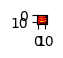

[[3.47539852e-03 3.47539852e-03 4.01729904e-02 2.27461964e-01
  2.00483337e-01 1.25592887e-01 2.77546234e-04 1.36126438e-02
  1.54866353e-01 1.50328875e-01 6.14548251e-02 4.02307138e-03
  3.47539852e-03]
 [3.47539852e-03 3.58556286e-02 1.26923695e-01 7.52592832e-02
  0.00000000e+00 6.66890442e-02 5.04361019e-02 4.57200930e-02
  2.97897141e-02 1.26541317e-01 1.58941165e-01 8.45758915e-02
  3.47539852e-03]
 [3.47539852e-03 4.58074398e-02 1.38933614e-01 3.12261850e-01
  3.03911388e-01 3.44392478e-01 2.95600206e-01 2.88283229e-01
  2.29152337e-01 2.77704805e-01 9.70870107e-02 1.70966983e-02
  3.47539852e-03]
 [3.47539852e-03 6.51912857e-03 5.09135500e-02 1.31551743e-01
  8.77359882e-02 1.11640446e-01 1.04306795e-01 1.00848205e-01
  0.00000000e+00 1.41678050e-01 8.91408175e-02 2.78443806e-02
  3.47539852e-03]
 [3.47539852e-03 1.07649192e-01 1.84252143e-01 2.76302937e-02
  5.24691902e-02 6.42367974e-02 4.94352244e-02 8.50941986e-02
  7.89159015e-02 6.54354542e-02 3.41528142e-03 3.73484083e-0

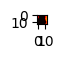

[[0.15428156 0.15428156 0.17189981 0.21390614 0.16942634 0.
  0.         0.         0.2391572  0.29389238 0.20634538 0.15428156
  0.15428156]
 [0.15428156 0.16982707 0.20160905 0.         0.         0.
  0.         0.         0.         0.08557303 0.25901234 0.27786395
  0.15428156]
 [0.15428156 0.15428156 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.20181973
  0.15428156]
 [0.15428156 0.15428156 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.18794739
  0.15428156]
 [0.15428156 0.16982707 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.18550512
  0.15428156]
 [0.15428156 0.05371404 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.25782257
  0.15428156]
 [0.15428156 0.00044776 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.21393669
  0.16672048]
 [0.15

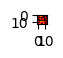

[[0.03097997 0.03097997 0.03097997 0.03351312 0.         0.14720349
  0.         0.1370444  0.         0.03049345 0.03224654 0.03172066
  0.03097997]
 [0.03097997 0.03097997 0.         0.14009267 0.18183172 0.06090078
  0.17611894 0.         0.12006144 0.01682415 0.         0.03097997
  0.03097997]
 [0.03097997 0.03097997 0.02774609 0.         0.         0.
  0.         0.         0.         0.         0.         0.03097997
  0.03097997]
 [0.03097997 0.03097997 0.         0.12299932 0.18617922 0.1543284
  0.13130274 0.03935986 0.         0.06288714 0.         0.02643455
  0.03097997]
 [0.03097997 0.03097997 0.04595605 0.         0.         0.
  0.         0.         0.         0.01638253 0.09699809 0.02726786
  0.03097997]
 [0.03097997 0.0279192  0.         0.0539339  0.11772972 0.03611896
  0.02463439 0.07976545 0.08463326 0.         0.         0.01843664
  0.03097997]
 [0.03097997 0.02192556 0.04111861 0.06115641 0.10908813 0.02388323
  0.         0.07651772 0.06675559 0.00392913 0.0

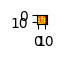

[[0.         0.         0.         0.         0.03521369 0.18239981
  0.21616916 0.20082852 0.05845563 0.01147633 0.         0.
  0.        ]
 [0.         0.         0.03130216 0.18394047 0.11858381 0.15133224
  0.19009383 0.08555532 0.13644561 0.0972596  0.03529576 0.01158399
  0.        ]
 [0.         0.05013146 0.15522468 0.11909119 0.14207026 0.20123269
  0.16537318 0.18309917 0.11549599 0.09947394 0.13917768 0.05008253
  0.        ]
 [0.         0.15640338 0.11010049 0.13785248 0.10523862 0.1553243
  0.12991399 0.1584222  0.11829595 0.12634386 0.08550978 0.03233717
  0.        ]
 [0.         0.16019262 0.11315475 0.09558094 0.10606296 0.15889178
  0.13948603 0.17197189 0.11111651 0.14689825 0.15429363 0.03361234
  0.        ]
 [0.         0.20330228 0.1970869  0.12882888 0.11054222 0.17874132
  0.1648259  0.1908985  0.1280932  0.11243418 0.19299495 0.06229421
  0.        ]
 [0.         0.12967823 0.12039856 0.16037193 0.14580646 0.23772009
  0.1984129  0.23298818 0.168625   0.2127

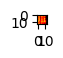

[[0.         0.         0.         0.0609825  0.0426994  0.21670726
  0.19972743 0.08944502 0.0309938  0.         0.         0.
  0.        ]
 [0.         0.         0.10904597 0.05696771 0.03156365 0.09032027
  0.13188607 0.10045548 0.11701081 0.07199217 0.         0.
  0.        ]
 [0.         0.06333354 0.11536572 0.12198573 0.05998905 0.14135666
  0.11767083 0.13543639 0.0852472  0.09740225 0.12513869 0.
  0.        ]
 [0.         0.08914191 0.15239684 0.10092449 0.04700439 0.13922966
  0.08643378 0.1150626  0.08165937 0.10879555 0.12748133 0.
  0.        ]
 [0.         0.07598326 0.12799686 0.11966654 0.02979616 0.10185798
  0.08300484 0.08003115 0.08652858 0.07804901 0.06875607 0.
  0.        ]
 [0.         0.12062978 0.1155616  0.08010968 0.05501641 0.12102003
  0.1036801  0.10754725 0.07850031 0.1844743  0.11821453 0.
  0.        ]
 [0.         0.07478712 0.1415618  0.19572532 0.01632199 0.08612123
  0.08359056 0.08058494 0.05404125 0.10107201 0.10759837 0.04208539
  0.        

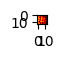

[[0.02140616 0.02140616 0.04743766 0.21319078 0.23271462 0.1662425
  0.         0.         0.15906367 0.10014639 0.04886495 0.02172469
  0.02140616]
 [0.02140616 0.04437513 0.2317646  0.16611558 0.03713783 0.038248
  0.08306512 0.         0.08406043 0.09004731 0.10268752 0.02887012
  0.02140616]
 [0.02140616 0.07584029 0.16839425 0.19716083 0.09878249 0.23917308
  0.1254686  0.13226703 0.10626356 0.13765031 0.04492419 0.02544073
  0.02140616]
 [0.02140616 0.05633369 0.2930556  0.08527295 0.02159701 0.14615048
  0.10312905 0.08802541 0.00747703 0.         0.09308615 0.00736187
  0.02140616]
 [0.02140616 0.08736154 0.2535476  0.0320825  0.05993418 0.16897008
  0.15351637 0.13961436 0.06889671 0.09209297 0.09274328 0.
  0.02140616]
 [0.02140616 0.13333274 0.32632393 0.19334362 0.03742306 0.21259584
  0.12988739 0.14741161 0.1179708  0.17628852 0.1538539  0.05074748
  0.02140616]
 [0.02140616 0.13009757 0.16727488 0.13159296 0.04809842 0.2637282
  0.19830601 0.15364523 0.1562502  0.1358564

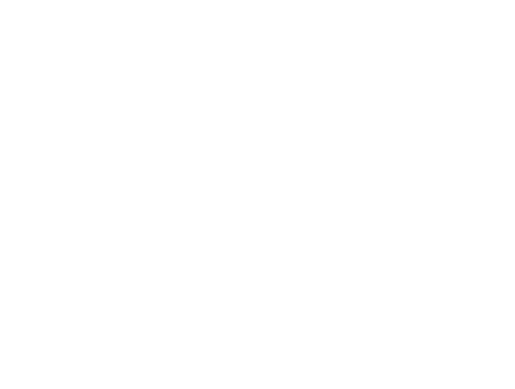

In [15]:

import matplotlib.pyplot as plt


layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_images)


image_index = 7

for layer_index in range(2):
    print('showing activations for layer ', layer_index+1)
    activations_for_image = activations[layer_index][image_index]


    num_filters = activations_for_image.shape[-1] 


    cols = 1
    rows =  num_filters
    plt.figure(figsize=(100, 100))

    for i in range(num_filters):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(activations_for_image[:, :, i], cmap='hot') 
        plt.show()
        print(np.array2string(activations_for_image[:,:,i]))
        plt.axis('off')
        

    
